# Macroeconomic Predictor

This notebook will explore the effects of macroecnonomic factors on the stock market. For my analysis, I intend to specifically focus on the impacts on the S&P 500 index as that broadly generalizes the economic state of the top United States companies.

In [1]:
from alpaca.data import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame, TimeFrameUnit
from datetime import datetime

from fredapi import Fred
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Task 1: Find S&P 500 Data

Given my initial research, I believe that Alpaca's python API should be able to give us all of the historical S&P 500 data we will need for this task. I requested the API key from Alpaca's website. For the sake of keeping all of my keys safe, I will import them from my local environment variables and use them for the execution of the notebook. 

### Alpaca

In [2]:
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

client = StockHistoricalDataClient(alpaca_api_key, alpaca_secret_key)

request_params = StockBarsRequest(
                        symbol_or_symbols="SPY",
                        timeframe=TimeFrame(1, TimeFrameUnit.Month),
                        start=datetime(2000, 1, 1),
                        end=datetime(2025, 3, 31)
                 )

bars = client.get_stock_bars(request_params)

bars_df = bars.df
bars_df

open    high       low     close  \
symbol timestamp                                                       
SPY    2016-01-01 05:00:00+00:00  200.49  201.90  181.0200  193.7208   
       2016-02-01 05:00:00+00:00  192.53  196.68  181.0900  193.3500   
       2016-03-01 05:00:00+00:00  195.01  210.55  194.4542  205.5200   
       2016-04-01 04:00:00+00:00  204.35  210.92  203.0900  206.3308   
       2016-05-01 04:00:00+00:00  206.92  210.69  202.7800  209.8400   
...                                  ...     ...       ...       ...   
       2024-11-01 04:00:00+00:00  571.32  603.35  567.8900  602.5500   
       2024-12-01 05:00:00+00:00  602.97  609.07  580.9100  586.0800   
       2025-01-01 05:00:00+00:00  589.39  610.78  575.3500  601.8200   
       2025-02-01 05:00:00+00:00  592.67  613.23  582.4400  594.1800   
       2025-03-01 05:00:00+00:00  596.18  597.34  546.8700  559.3900   

                                        volume  trade_count        vwap  
symbol timestamp                                                         
SPY    2016-01-01 05:00:00+00:00  3.818766e+09   13463245.0  191.091533  
       2016-02-01 05:00:00+00:00  2.982148e+09   11420093.0  189.635941  
       2016-03-01 05:00:00+00:00  2.415842e+09    8659580.0  201.753616  
       2016-04-01 04:00:00+00:00  1.986942e+09    6822081.0  207.013830  
       2016-05-01 04:00:00+00:00  1.894023e+09    6744944.0  206.421586  
...                                        ...          ...         ...  
       2024-11-01 04:00:00+00:00  9.017136e+08    8153583.0  591.063999  
       2024-12-01 05:00:00+00:00  1.059637e+09    8707117.0  597.726175  
       2025-01-01 05:00:00+00:00  9.966060e+08    9472819.0  594.647469  
       2025-02-01 05:00:00+00:00  8.703271e+08    9571250.0  600.010040  
       2025-03-01 05:00:00+00:00  1.496984e+09   14496911.0  567.019153  

[111 rows x 7 columns]

Unfortunately, I can tell that Alpaca is not the right dataset to use to get S&P 500 data as it does not go all the way back to the index's inception. Instead, I will try using **fredapi**'s built in S&P 500 tracker to see if that goes all the way to the index's origins.

### FredAPI

Before starting with **fredapi**, I first had to get a key from them. This was done by applying from their website.

In [3]:
fred_key = os.getenv('FRED_KEY')
fred = Fred(api_key=fred_key)

In [4]:
# Get S&P 500 index data (daily closes)
sp500_fred = fred.get_series('SP500')

# Convert to DataFrame
sp500_fred

2015-09-04    1921.22
2015-09-07        NaN
2015-09-08    1969.41
2015-09-09    1942.04
2015-09-10    1952.29
               ...   
2025-08-28    6501.86
2025-08-29    6460.26
2025-09-01        NaN
2025-09-02    6415.54
2025-09-03    6448.26
Length: 2609, dtype: float64

FRED is also not the right source as it doesn't go all the way back to the inception of the S&P 500. I have also found that **yfinance** might have the capabilities/data to support the predictive task.

### yfinance

In [5]:
# S&P 500 Index (not an ETF)
sp500_yf = yf.download("^GSPC", start="1950-01-01", interval="1d", auto_adjust=True)
sp500_yf

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...
2025-08-27,6481.399902,6487.060059,6457.839844,6462.259766,4143680000
2025-08-28,6501.859863,6508.229980,6466.959961,6483.839844,4283760000


Given that the "**yfinance**" library does have a ticker that has data all the way back since the S&P 500's inception, I will use this dataset to merge into our macroeconomic factors DataFrame. Also, since I only need the close price of each day, I will drop all of the other columns in the dataframe to leave myself with just the close column.

In [6]:
# Keep only the close price
sp500 = sp500_yf[['Close']]
sp500 = sp500.rename(columns={'Close': 'SP500_Close'})
sp500 = sp500.resample('MS').last()
sp500

Price,SP500_Close
Ticker,^GSPC
Date,
1950-01-01,17.049999
1950-02-01,17.219999
1950-03-01,17.290001
1950-04-01,17.959999
1950-05-01,18.780001
...,...
2025-05-01,5911.689941
2025-06-01,6204.950195


In [7]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 909 entries, 1950-01-01 to 2025-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (SP500_Close, ^GSPC)  909 non-null    float64
dtypes: float64(1)
memory usage: 14.2 KB


In [8]:
sp500.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
SP500_Close,^GSPC,909.0,899.495609,1276.424779,17.049999,89.25,272.019989,1267.380005,6460.259766


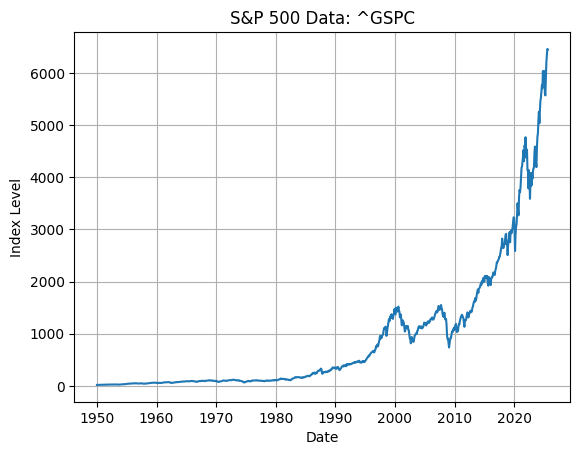

In [9]:
plt.plot(sp500)
plt.title('S&P 500 Data: ^GSPC')
plt.xlabel('Date')
plt.ylabel('Index Level')
plt.grid(True)

**NOTE**: I will also make my target variable to be percent change from the current S&P 500 value. This is because I still want to assume some sort of stationarity with our data, and I want to make my models more statistically sound. Because the graph of the S&P 500 value has exponentially increased over time, I would think that predicting the percent change will yield more stable mean, median, and variance values.

I will also shift the percent changes between the current month and the previous month up by one row. This is because my goal for this task is to have my current month's macroeconomic data successfully predict the percent change to next month's stock values. The shift will accomplish that idea.

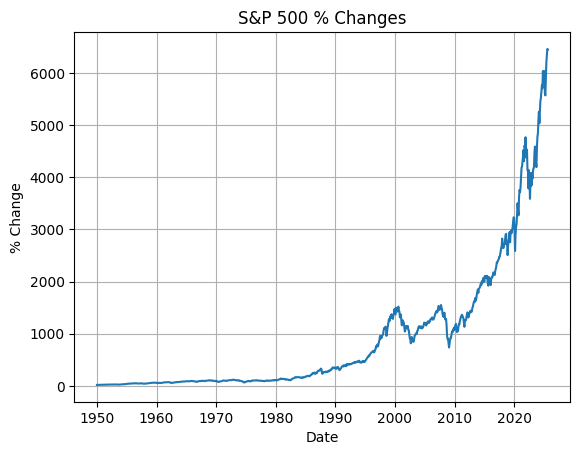

In [10]:
plt.plot(sp500)
plt.title('S&P 500 % Changes') 
plt.xlabel('Date')
plt.ylabel('% Change')
plt.grid(True)

## Task 2: Find Macroeconomic Data

Now that our S&P 500 data has been secured as our response variable, I will now find all of the macroeconomic features that I want to compare against each other in order to fulfill the research question I originally posed. Not only do I want to quantify the effects of macroeconomic factors on the stock market, but I want to evaluate which of these features has the most impact, either positive or negative. To meet that goal, I have read through the **fredapi** documentation and other articles on impactful macroeconomic factors to find the features that I think best represent the areas that highlight important macroeconomic factors. The list is as follows:

CPI: Consumer Price Index

UNRATE: Unemployment Rate

FEDFUNDS: Federal Funds Rate

GS10: 10 Year Treasury Rate

M2: Money Supply - how much money is in circulation

INDPRO: Industrial Production Index

RSAFS: Retail and Food Service Sales

UMCSENT: University of Michigan Consumer Sentiment Index

HOUST: Housing Starts

MSPUS: Median House Price

TWEXB: US Dollar Strength

NETEXP: Net Exports

CPIAUCNS: Consumer Price Index for All Urban Consumers: All Items in U.S. City Average

GDPC1: Real Gross Domestic Product

GFDEBTN: Federal Debt: Total Public Debt

SAHMREALTIME: Real-time Sahm Rule Recession Indicator

FPCPITOTLZGUSA: Inflation, consumer prices for the United States

TB3MS: 3-Month Treasury Bill Secondary Market Rate, Discount Basis

PCEPI: Personal Consumption Expenditures: Chain-type Price Index

AAA: Moody's Seasoned Aaa Corporate Bond Yield

CIVPART: Labor Force Participation Rate

In [11]:
start_date="1901-01-01"
macro_factors = {
    'CPI': 'CPIAUCSL',
    'UNRATE': 'UNRATE',
    'FEDFUNDS': 'FEDFUNDS',
    'GS10': 'GS10',
    'M2': 'M2SL',
    'INDPRO': 'INDPRO',
    'RSAFS': 'RSAFS',
    'UMCSENT': 'UMCSENT',
    'HOUST': 'HOUST',
    'MSPUS': 'MSPUS',
    'TWEXB': 'TWEXB',
    'NETEXP': 'NETEXP',
    'CPIAUCNS': 'CPIAUCNS',
    'GDPC1': 'GDPC1',
    'GFDEBTN': 'GFDEBTN',
    'SAHMREALTIME': 'SAHMREALTIME',
    'FPCPITOTLZGUSA': 'FPCPITOTLZGUSA',
    'TB3MS': 'TB3MS',
    'PCEPI': 'PCEPI',
    'AAA': 'AAA',
    'CIVPART': 'CIVPART'
}

fred_df = pd.DataFrame()

# Add each of the macroeconomic features to the dataframe
for key, value in macro_factors.items():
    data = fred.get_series(value)
    fred_df[key] = data

fred_df

,CPI,UNRATE,FEDFUNDS,GS10,M2,INDPRO,RSAFS,UMCSENT,HOUST,MSPUS,...,NETEXP,CPIAUCNS,GDPC1,GFDEBTN,SAHMREALTIME,FPCPITOTLZGUSA,TB3MS,PCEPI,AAA,CIVPART
1947-01-01,21.480,NaN,NaN,NaN,NaN,13.6554,NaN,NaN,NaN,NaN,...,10.875,21.500,2182.681,NaN,NaN,NaN,0.38,NaN,2.57,NaN
1947-02-01,21.620,NaN,NaN,NaN,NaN,13.7361,NaN,NaN,NaN,NaN,...,NaN,21.500,NaN,NaN,NaN,NaN,0.38,NaN,2.55,NaN
1947-03-01,22.000,NaN,NaN,NaN,NaN,13.8167,NaN,NaN,NaN,NaN,...,NaN,21.900,NaN,NaN,NaN,NaN,0.38,NaN,2.55,NaN
1947-04-01,22.000,NaN,NaN,NaN,NaN,13.7092,NaN,NaN,NaN,NaN,...,11.294,21.900,2176.892,NaN,NaN,NaN,0.38,NaN,2.53,NaN
1947-05-01,21.950,NaN,NaN,NaN,NaN,13.7629,NaN,NaN,NaN,NaN,...,NaN,21.900,NaN,NaN,NaN,NaN,0.38,NaN,2.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,319.615,4.2,4.33,4.28,21656.9,103.6370,722572.0,57.0,1355.0,NaN,...,NaN,319.799,NaN,NaN,0.27,NaN,4.20,125.791,5.29,62.5
2025-04-01,320.321,4.2,4.33,4.28,21804.7,103.6696,721789.0,52.2,1398.0,410800.0,...,-869.372,320.795,23703.782,36211469.0,0.27,NaN,4.21,125.977,5.45,62.6
2025-05-01,320.580,4.2,4.33,4.42,21883.9,103.7484,716101.0,52.2,1282.0,NaN,...,NaN,321.465,NaN,NaN,0.27,NaN,4.25,126.172,5.54,62.4
2025-06-01,321.500,4.1,4.33,4.38,22021.4,104.1137,722571.0,60.7,1358.0,NaN,...,NaN,322.561,NaN,NaN,0.17,NaN,4.23,126.533,5.46,62.3


In [12]:
fred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 943 entries, 1947-01-01 to 2025-07-01
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CPI             943 non-null    float64
 1   UNRATE          931 non-null    float64
 2   FEDFUNDS        853 non-null    float64
 3   GS10            868 non-null    float64
 4   M2              799 non-null    float64
 5   INDPRO          943 non-null    float64
 6   RSAFS           403 non-null    float64
 7   UMCSENT         663 non-null    float64
 8   HOUST           799 non-null    float64
 9   MSPUS           250 non-null    float64
 10  TWEXB           43 non-null     float64
 11  NETEXP          314 non-null    float64
 12  CPIAUCNS        943 non-null    float64
 13  GDPC1           314 non-null    float64
 14  GFDEBTN         238 non-null    float64
 15  SAHMREALTIME    788 non-null    float64
 16  FPCPITOTLZGUSA  65 non-null     float64
 17  TB3MS           

In [13]:
fred_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CPI,943.0,1.229964e+02,8.843615e+01,21.480000,32.700000,1.095000e+02,1.989500e+02,3.221320e+02
UNRATE,931.0,5.671858e+00,1.707744e+00,2.500000,4.300000,5.500000e+00,6.700000e+00,1.480000e+01
FEDFUNDS,853.0,4.607057e+00,3.552996e+00,0.050000,1.880000,4.330000e+00,6.140000e+00,1.910000e+01
GS10,868.0,5.541129e+00,2.883215e+00,0.620000,3.530000,4.770000e+00,7.340000e+00,1.532000e+01
M2,799.0,5.574286e+03,5.943352e+03,286.600000,987.300000,3.398600e+03,8.116150e+03,2.211540e+04
INDPRO,943.0,6.033799e+01,3.069702e+01,13.171600,34.568900,5.507260e+01,9.266725e+01,1.041137e+02
RSAFS,403.0,3.772690e+05,1.498894e+05,158647.000000,266438.500000,3.521790e+05,4.632140e+05,7.262830e+05
UMCSENT,663.0,8.498416e+01,1.314575e+01,50.000000,74.800000,8.880000e+01,9.470000e+01,1.120000e+02
HOUST,799.0,1.431836e+03,3.781483e+02,478.000000,1211.000000,1.452000e+03,1.645000e+03,2.494000e+03
MSPUS,250.0,1.582012e+05,1.178106e+05,17800.000000,56825.000000,1.298500e+05,2.362000e+05,4.426000e+05


**NOTE**: Because the problem I am trying to solve involves trying to predict future stock market movement/trends based on current macroeconomic data, I have read that it is wise to lag the data provided by 'fred_df' since that will simulate us predicting into the future. This is because a lot of the macroeconomic factors don't show their impacts on the stock market until later on. As an arbitrary starting point, I will add 3 consecutive months of lag. 

In [14]:
# Add 3 months of lag
cols = fred_df.columns
for lag in range(1, 4):
    for col in cols:
        fred_df[f'{col}_lag_{lag}'] = fred_df[col].shift(lag)

fred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 943 entries, 1947-01-01 to 2025-07-01
Data columns (total 84 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CPI                   943 non-null    float64
 1   UNRATE                931 non-null    float64
 2   FEDFUNDS              853 non-null    float64
 3   GS10                  868 non-null    float64
 4   M2                    799 non-null    float64
 5   INDPRO                943 non-null    float64
 6   RSAFS                 403 non-null    float64
 7   UMCSENT               663 non-null    float64
 8   HOUST                 799 non-null    float64
 9   MSPUS                 250 non-null    float64
 10  TWEXB                 43 non-null     float64
 11  NETEXP                314 non-null    float64
 12  CPIAUCNS              943 non-null    float64
 13  GDPC1                 314 non-null    float64
 14  GFDEBTN               238 non-null    float64
 15  SAHM

## Task 3: Join the Datasets

In [15]:
# Ensure both indices are datetime and have same alignment
sp500.index = pd.to_datetime(sp500.index).to_period('M').to_timestamp(how='end')
fred_df.index = pd.to_datetime(fred_df.index).to_period('M').to_timestamp(how='end')

# Flatten the index from multi-level index to single index
sp500.columns = sp500.columns.get_level_values(0)

# Join the two dataframes
combined_df = fred_df.join(sp500, how='inner')

print(combined_df.info())
combined_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 907 entries, 1950-01-31 23:59:59.999999999 to 2025-07-31 23:59:59.999999999
Data columns (total 85 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CPI                   907 non-null    float64
 1   UNRATE                907 non-null    float64
 2   FEDFUNDS              853 non-null    float64
 3   GS10                  868 non-null    float64
 4   M2                    799 non-null    float64
 5   INDPRO                907 non-null    float64
 6   RSAFS                 403 non-null    float64
 7   UMCSENT               663 non-null    float64
 8   HOUST                 799 non-null    float64
 9   MSPUS                 250 non-null    float64
 10  TWEXB                 43 non-null     float64
 11  NETEXP                302 non-null    float64
 12  CPIAUCNS              907 non-null    float64
 13  GDPC1                 302 non-null    float64
 14  GFDEBTN          

,CPI,UNRATE,FEDFUNDS,GS10,M2,INDPRO,RSAFS,UMCSENT,HOUST,MSPUS,...,CPIAUCNS_lag_3,GDPC1_lag_3,GFDEBTN_lag_3,SAHMREALTIME_lag_3,FPCPITOTLZGUSA_lag_3,TB3MS_lag_3,PCEPI_lag_3,AAA_lag_3,CIVPART_lag_3,SP500_Close
1950-01-31 23:59:59.999999999,23.510,6.5,NaN,NaN,NaN,14.0049,NaN,NaN,NaN,NaN,...,23.700,2257.352,NaN,NaN,NaN,1.05,NaN,2.61,59.6,17.049999
1950-02-28 23:59:59.999999999,23.610,6.4,NaN,NaN,NaN,14.0586,NaN,NaN,NaN,NaN,...,23.800,NaN,NaN,NaN,NaN,1.08,NaN,2.60,59.4,17.219999
1950-03-31 23:59:59.999999999,23.640,6.3,NaN,NaN,NaN,14.5156,NaN,NaN,NaN,NaN,...,23.600,NaN,NaN,NaN,NaN,1.10,NaN,2.58,59.2,17.290001
1950-04-30 23:59:59.999999999,23.650,5.8,NaN,NaN,NaN,14.9995,NaN,NaN,NaN,NaN,...,23.500,2346.104,NaN,NaN,NaN,1.07,NaN,2.57,58.9,17.959999
1950-05-31 23:59:59.999999999,23.770,5.5,NaN,NaN,NaN,15.3489,NaN,NaN,NaN,NaN,...,23.500,NaN,NaN,NaN,NaN,1.12,NaN,2.58,58.9,18.780001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-31 23:59:59.999999999,319.615,4.2,4.33,4.28,21656.9,103.6370,722572.0,57.0,1355.0,NaN,...,315.605,NaN,NaN,0.40,NaN,4.27,124.769,5.20,62.5,5611.850098
2025-04-30 23:59:59.999999999,320.321,4.2,4.33,4.28,21804.7,103.6696,721789.0,52.2,1398.0,410800.0,...,317.671,23512.717,36214310.0,0.37,NaN,4.21,125.239,5.46,62.6,5569.060059
2025-05-31 23:59:59.999999999,320.580,4.2,4.33,4.42,21883.9,103.7484,716101.0,52.2,1282.0,NaN,...,319.082,NaN,NaN,0.27,NaN,4.22,125.772,5.32,62.4,5911.689941
2025-06-30 23:59:59.999999999,321.500,4.1,4.33,4.38,22021.4,104.1137,722571.0,60.7,1358.0,NaN,...,319.799,NaN,NaN,0.27,NaN,4.20,125.791,5.29,62.5,6204.950195


## Task 4: Clean the Data

### Drop Duplicates

There should be no duplicates (because this is a time series), but just in case there was something wrong with the sampling or the API, I will attempt to drop any duplicates.

In [16]:
combined_df.drop_duplicates(inplace=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 907 entries, 1950-01-31 23:59:59.999999999 to 2025-07-31 23:59:59.999999999
Data columns (total 85 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CPI                   907 non-null    float64
 1   UNRATE                907 non-null    float64
 2   FEDFUNDS              853 non-null    float64
 3   GS10                  868 non-null    float64
 4   M2                    799 non-null    float64
 5   INDPRO                907 non-null    float64
 6   RSAFS                 403 non-null    float64
 7   UMCSENT               663 non-null    float64
 8   HOUST                 799 non-null    float64
 9   MSPUS                 250 non-null    float64
 10  TWEXB                 43 non-null     float64
 11  NETEXP                302 non-null    float64
 12  CPIAUCNS              907 non-null    float64
 13  GDPC1                 302 non-null    float64
 14  GFDEBTN          

### Drop NA

TWEXB             864
TWEXB_lag_2       864
TWEXB_lag_3       864
TWEXB_lag_1       864
FPCPITOTLZGUSA    842
                 ... 
CPIAUCNS_lag_3      0
TB3MS_lag_3         0
AAA_lag_3           0
CIVPART_lag_3       0
SP500_Close         0
Length: 85, dtype: int64


Text(0.5, 1.0, 'Missing Macroeconomic Data by Feature')

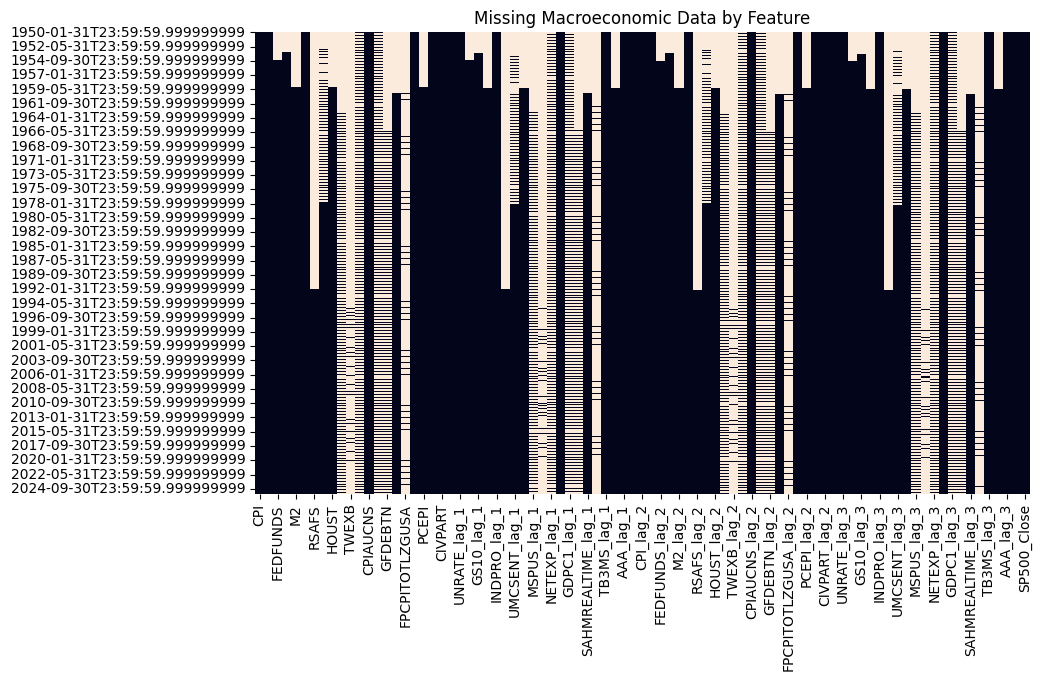

In [17]:
# Count missing values
missing = combined_df.isnull().sum().sort_values(ascending=False)
print(missing)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(combined_df.isnull(), cbar=False)
plt.title("Missing Macroeconomic Data by Feature")

After analyzing our initial macroeconomic features, I can see that the features with the most missing values are "RSAFS: Retail and Food Service Sales" and "TWEXB: US Dollar Strength". Because these features have such limited amounts of data, I would rather choose to drop them from our dataframe entirely such that we can retain as much of the data as possible. Despite how much I believe they can contribute meaningful value to the analysis of macroeconomic impacts on the stock market, I would rather drop them for the sake of not having to impute the data with proper values. For the rest of the missing data, most of these features are missing data at the beginning of their series. As a result, I plan to drop all null/NA values until I get the data to a point where all of the features have a value that I can forward fill if necessary.

In [18]:
combined_df.drop(columns=['TWEXB', 'TWEXB_lag_1', 'TWEXB_lag_2', 'TWEXB_lag_3', 'RSAFS', 'RSAFS_lag_1', 'RSAFS_lag_2', 'RSAFS_lag_3'], inplace=True)
combined_df = combined_df.ffill()
combined_df.dropna(inplace=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 712 entries, 1966-04-30 23:59:59.999999999 to 2025-07-31 23:59:59.999999999
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CPI                   712 non-null    float64
 1   UNRATE                712 non-null    float64
 2   FEDFUNDS              712 non-null    float64
 3   GS10                  712 non-null    float64
 4   M2                    712 non-null    float64
 5   INDPRO                712 non-null    float64
 6   UMCSENT               712 non-null    float64
 7   HOUST                 712 non-null    float64
 8   MSPUS                 712 non-null    float64
 9   NETEXP                712 non-null    float64
 10  CPIAUCNS              712 non-null    float64
 11  GDPC1                 712 non-null    float64
 12  GFDEBTN               712 non-null    float64
 13  SAHMREALTIME          712 non-null    float64
 14  FPCPITOTLZGUSA   

## Task 5: Visualize the Features

Now that we have our feature dataframe all tidy, I will now graph the features to see if we can extract any preliminary analysis about the data. Below, I will start by showing the trends of each feature over time.

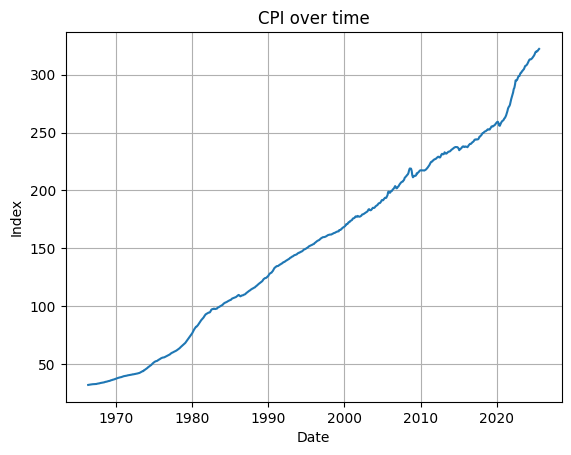

In [19]:
# Examine CPI trends
sns.lineplot(combined_df['CPI'])
plt.title('CPI over time')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)

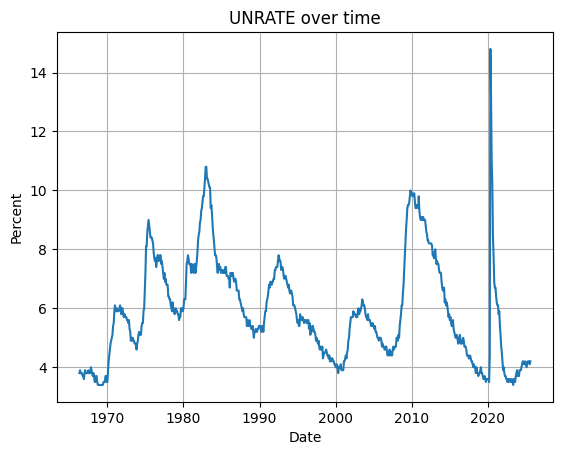

In [20]:
# Examine unemployment rate trends
sns.lineplot(combined_df['UNRATE'])
plt.title('UNRATE over time')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.grid(True)

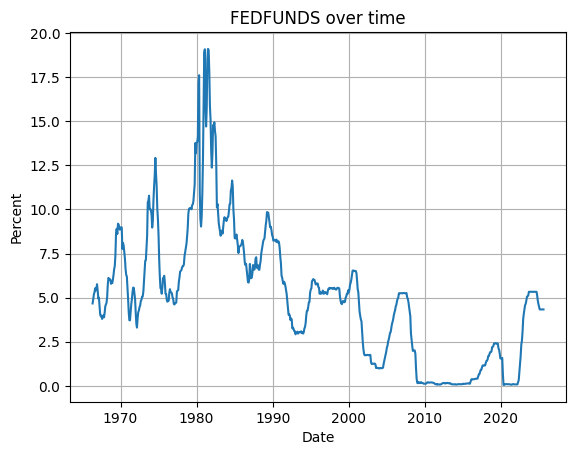

In [21]:
# Examine federal funds rate trends
sns.lineplot(combined_df['FEDFUNDS'])
plt.title('FEDFUNDS over time')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.grid(True)

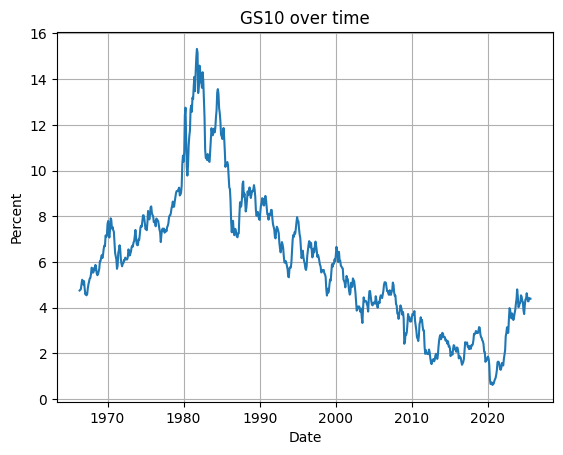

In [22]:
# Examine GS10 trends
sns.lineplot(combined_df['GS10'])
plt.title('GS10 over time')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.grid(True)

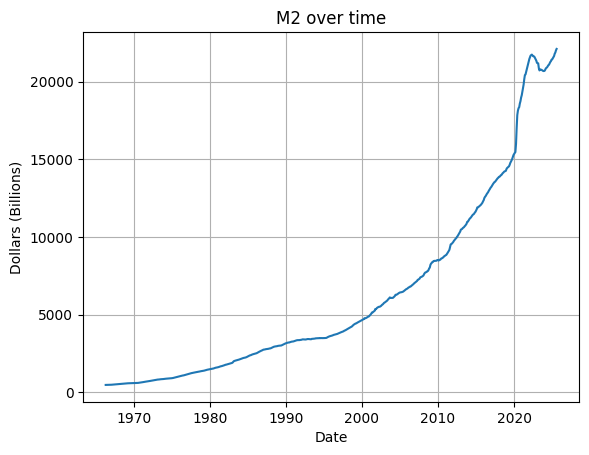

In [23]:
# Examine M2 trends
sns.lineplot(combined_df['M2'])
plt.title('M2 over time')
plt.xlabel('Date')
plt.ylabel('Dollars (Billions)')
plt.grid(True)

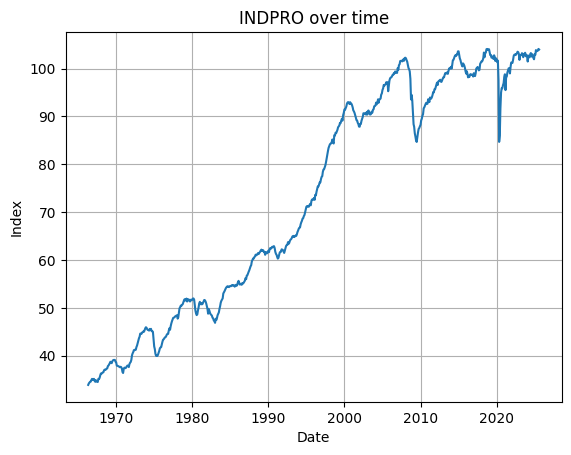

In [24]:
# Examine INDPRO trends
sns.lineplot(combined_df['INDPRO'])
plt.title('INDPRO over time')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)

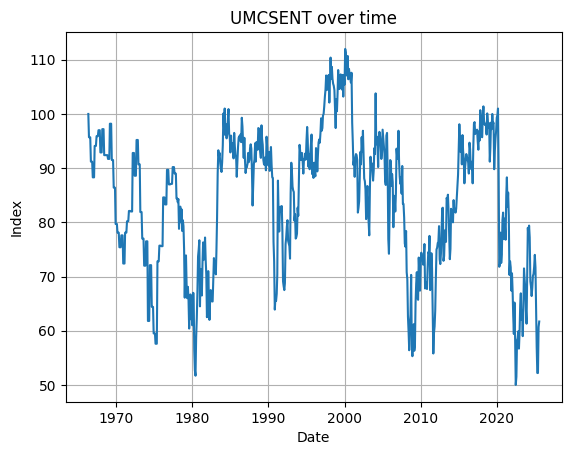

In [25]:
# Examine consumer sentiment trends
sns.lineplot(combined_df['UMCSENT'])
plt.title('UMCSENT over time')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)

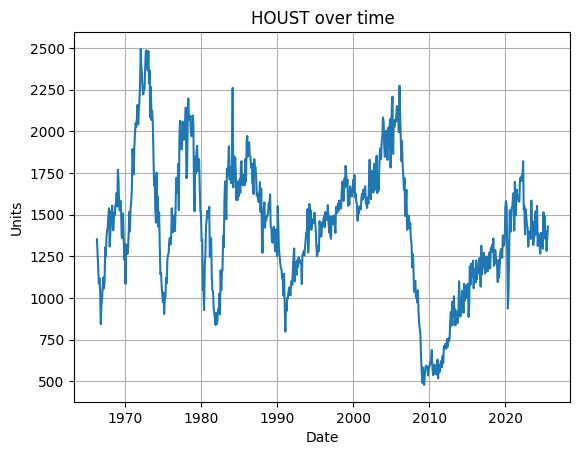

In [26]:
# Examine HOUST trends
sns.lineplot(combined_df['HOUST'])
plt.title('HOUST over time')
plt.xlabel('Date')
plt.ylabel('Units')
plt.grid(True)

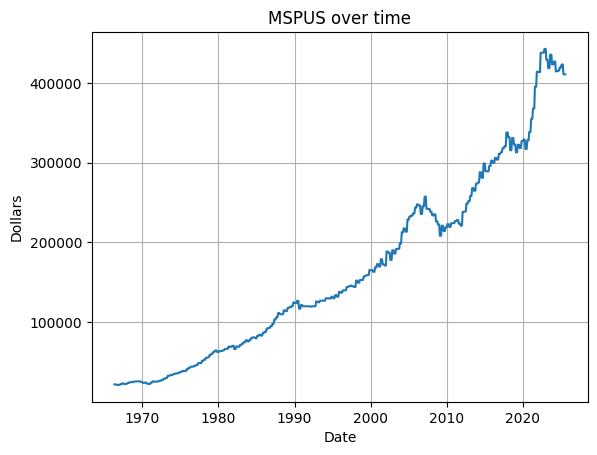

In [27]:
# Examine MSPUS trends
sns.lineplot(combined_df['MSPUS'])
plt.title('MSPUS over time')
plt.xlabel('Date')
plt.ylabel('Dollars')
plt.grid(True)

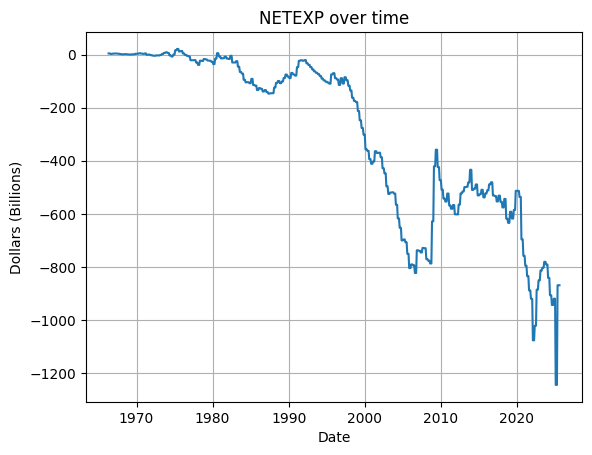

In [28]:
# Examine NETEXP trends
sns.lineplot(combined_df['NETEXP'])
plt.title('NETEXP over time')
plt.xlabel('Date')
plt.ylabel('Dollars (Billions)')
plt.grid(True)

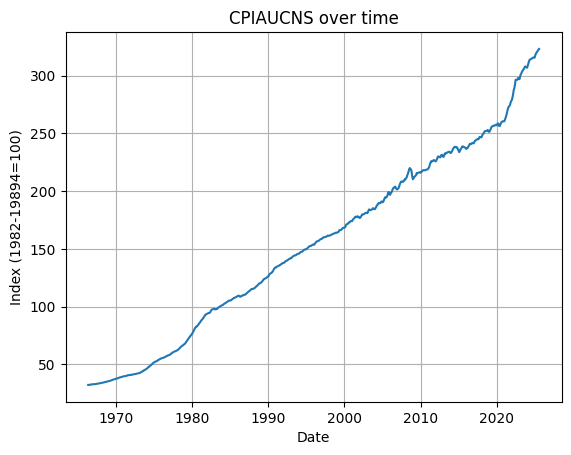

In [29]:
# Examine CPIAUCNS trends
sns.lineplot(combined_df['CPIAUCNS'])
plt.title('CPIAUCNS over time')
plt.xlabel('Date')
plt.ylabel('Index (1982-19894=100)')
plt.grid(True)

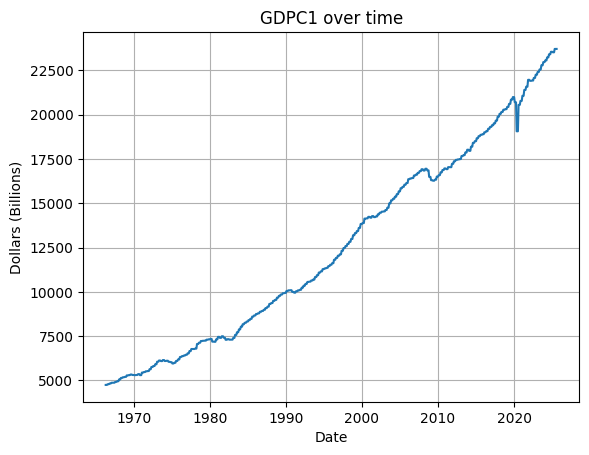

In [30]:
# Examine GDPC1 trends
sns.lineplot(combined_df['GDPC1'])
plt.title('GDPC1 over time')
plt.xlabel('Date')
plt.ylabel('Dollars (Billions)')
plt.grid(True)

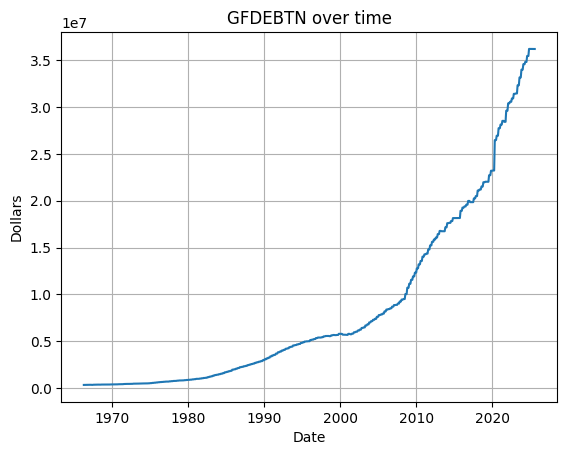

In [31]:
# Examine GFDEBTN trends
sns.lineplot(combined_df['GFDEBTN'])
plt.title('GFDEBTN over time')
plt.xlabel('Date')
plt.ylabel('Dollars')
plt.grid(True)

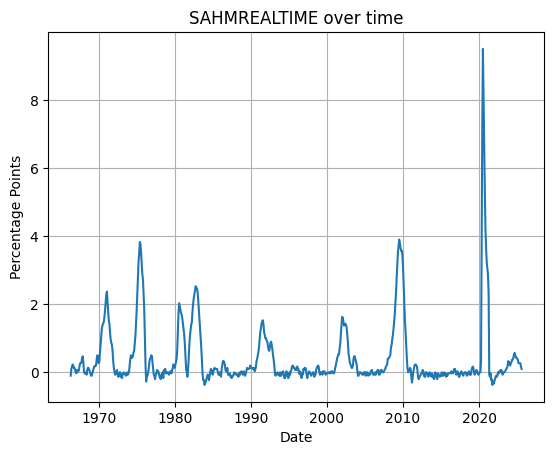

In [32]:
# Examine SAHMREALTIME trends
sns.lineplot(combined_df['SAHMREALTIME'])
plt.title('SAHMREALTIME over time')
plt.xlabel('Date')
plt.ylabel('Percentage Points')
plt.grid(True)

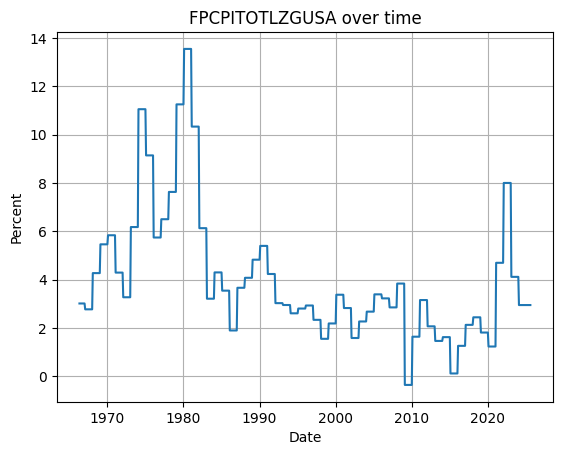

In [33]:
# Examine FPCPITOTLZGUSA trends
sns.lineplot(combined_df['FPCPITOTLZGUSA'])
plt.title('FPCPITOTLZGUSA over time')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.grid(True)

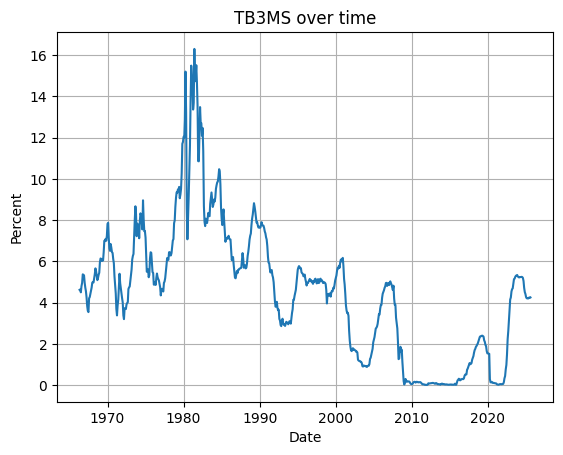

In [34]:
# Examine TB3MS trends
sns.lineplot(combined_df['TB3MS'])
plt.title('TB3MS over time')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.grid(True)

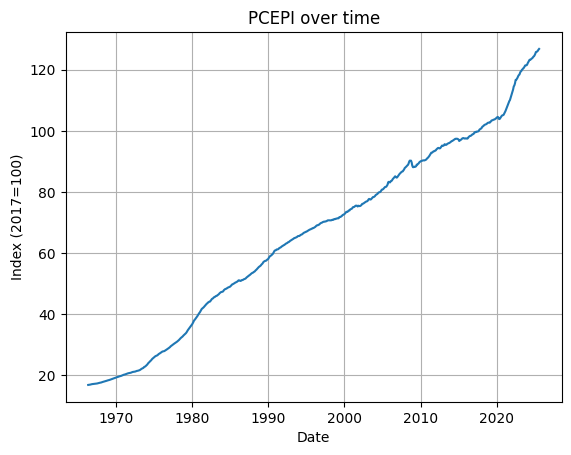

In [35]:
# Examine PCEPI trends
sns.lineplot(combined_df['PCEPI'])
plt.title('PCEPI over time')
plt.xlabel('Date')
plt.ylabel('Index (2017=100)')
plt.grid(True)

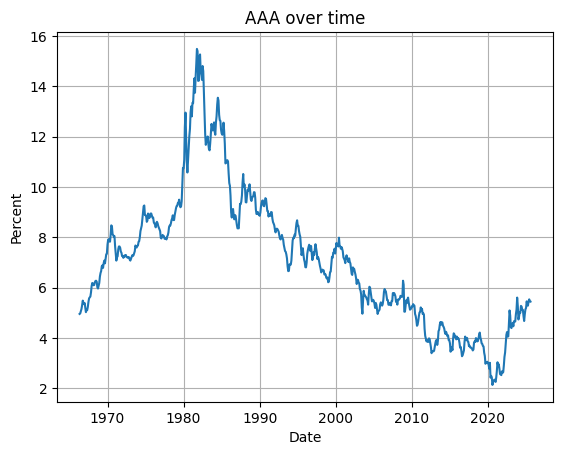

In [36]:
# Examine AAA trends
sns.lineplot(combined_df['AAA'])
plt.title('AAA over time')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.grid(True)

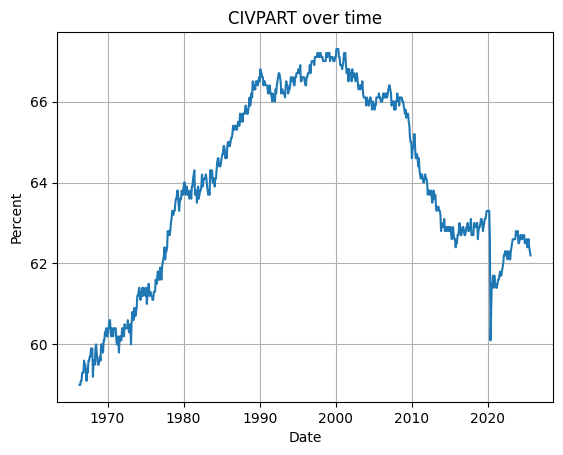

In [37]:
# Examine CIVPART trends
sns.lineplot(combined_df['CIVPART'])
plt.title('CIVPART over time')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.grid(True)

Based on the plots of the features, the only outlier in the graphs would be when the unemployment rate spiked right around 2020. This is best explained by the COVID-19 pandemic, and I will keep an eye on it to make sure that this irregularity in what was going on in the world doesn't skew the bias of this feature too much. However, if we compare this to our S&P 500 data, we also see that the stock market was impacted by COVID-19, meaning that maybe there is some sort of inverse relationship between unemployment rates and the stock market value. It could still be the case that since unemployment rates grew because of COVID, this is what adversely affected the markets.

**NOTE**: I did not visualize the lags since that would be trivial. Those features would have the exact same graph as the features above except they would be shifted 3 spots. That does not create for an interesting or engaging use of the reader's time, and thus I shall exclude it for now. Just know that the graph should look identical in shape for the lags.

## Task 6: Outlier Check

In [38]:
Q1 = combined_df.quantile(0.25)
Q3 = combined_df.quantile(0.75)
IQR = Q3 - Q1

# Find outliers the IQR formula
outliers = ((combined_df < (Q1 - 1.5 * IQR)) | (combined_df > (Q3 + 1.5 * IQR)))

# Count number of outliers per feature
outlier_counts = outliers.sum()

print(outlier_counts)

CPI               0
UNRATE            3
FEDFUNDS         18
GS10             11
M2               54
                 ..
TB3MS_lag_3      16
PCEPI_lag_3       0
AAA_lag_3        15
CIVPART_lag_3     0
SP500_Close      59
Length: 77, dtype: int64


## Task 7: Train/Test Split

Beacuse I want to split my data chronologically, utilizing sklearn's 'train_test_split()' method will suffice as long as I set the 'shuffle' parameter equal to 'False' such that the data is not randomly sampled. This will instead section off the first 80% of my data as the training set and the latter 20% as my test set.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = combined_df.drop(columns=['SP500_Close'])
y = combined_df['SP500_Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
X_train.tail(1)

,CPI,UNRATE,FEDFUNDS,GS10,M2,INDPRO,UMCSENT,HOUST,MSPUS,NETEXP,...,NETEXP_lag_3,CPIAUCNS_lag_3,GDPC1_lag_3,GFDEBTN_lag_3,SAHMREALTIME_lag_3,FPCPITOTLZGUSA_lag_3,TB3MS_lag_3,PCEPI_lag_3,AAA_lag_3,CIVPART_lag_3
2007-09-30 23:59:59.999999999,208.547,4.7,4.94,4.52,7413.3,101.9428,83.4,1183.0,241800.0,-728.954,...,-745.806,208.352,16713.314,8867677.0,0.03,2.852672,4.61,86.529,5.79,66.0


In [41]:
X_test.head(1)

,CPI,UNRATE,FEDFUNDS,GS10,M2,INDPRO,UMCSENT,HOUST,MSPUS,NETEXP,...,NETEXP_lag_3,CPIAUCNS_lag_3,GDPC1_lag_3,GFDEBTN_lag_3,SAHMREALTIME_lag_3,FPCPITOTLZGUSA_lag_3,TB3MS_lag_3,PCEPI_lag_3,AAA_lag_3,CIVPART_lag_3
2007-10-31 23:59:59.999999999,209.19,4.7,4.76,4.53,7428.4,101.6446,80.9,1264.0,238400.0,-729.699,...,-728.954,208.299,16809.587,9007653.0,0.07,2.852672,4.82,86.661,5.73,66.0


Since my testing data starts right after where my training data ends chronologically, this is a good sign that the data was split chronologically.

## Task 8: Modeling

Given the complexity of the task, I would like to utilize different models to see if one particular model drastically outperforms the others in predicting this problem. After talking with my advisor for this course, I have decided to utilize LASSO regression as my baseline model while also trying out Random Forest and XGBoost to see if there are any significant model scoring metric improvements. I will use RMSE, MAE, and R2 to score my models.

In [42]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
# Define function to score all models (LASSO, RandomForest, XGBoost) 
def performance_metrics(y_true, y_pred):
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R2": r2}

### LASSO Regression

In [44]:
# LASSO pipeline
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=1000))
])

# Hyperparameters
lasso_params = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# LASSO CV model
lasso_grid = GridSearchCV(lasso_pipe, 
                          param_grid=lasso_params, 
                          cv=TimeSeriesSplit(n_splits=5),
                          scoring='neg_mean_squared_error')

In [45]:
# Fit model and get best params
lasso_grid.fit(X_train, y_train)
print(lasso_grid.best_params_)

{'lasso__alpha': 10}


In [46]:
# Run predicts and compare training accuracy to testing accuracy
lasso_train_preds = lasso_grid.predict(X_train)
lasso_test_preds = lasso_grid.predict(X_test)

train_performance = performance_metrics(y_train, lasso_train_preds)
print('LASSO Train Performance:', train_performance)
test_performance = performance_metrics(y_test, lasso_test_preds)
print('LASSO Test Performance:', test_performance)

LASSO Train Performance: {'RMSE': 91.80226131648229, 'MAE': 67.53227703787371, 'R2': 0.9589269136334477}
LASSO Test Performance: {'RMSE': 1929.9310283830443, 'MAE': 1416.552133918074, 'R2': -0.8447774027906134}


In [47]:
print(lasso_grid.best_estimator_.named_steps['lasso'].coef_)

[  0.          -0.          -0.          -0.           0.
 194.49734308  41.7821174   -0.           0.         -30.44929644
   0.           0.           0.          20.25328726  -0.
  -0.          -0.          -0.          -0.           0.
  -0.           0.         -14.98842554   0.          62.88131163
   0.          -0.           0.          -0.           0.
   0.           0.           0.          -0.           0.
  -0.          -0.          -0.           0.          -0.
   0.          -0.           0.          56.69366349   0.
  -0.           0.          -0.           0.           0.
   0.           0.          -0.           0.          -0.
  -0.          -0.           0.         -53.6521794    0.
  -8.88355061   0.          53.58051457   0.          -0.
   0.          -0.           0.           0.           0.
  20.66329268  -0.           0.          -0.          -0.
  -0.        ]


This is disappointing and concerning. It looks as though LASSO, despite using hyperparameter tuning with GridSearchCV, is still overfitting the data. We have a relatively good looking RMSE and MAE for the train set, but the test performance metrics are considerably worse. Having a negative R2 score for my test data means that this model is doing worse than just predicting the mean for every value. However, I am hoping that this is just because LASSO is trying to capture the linear relationships between these variables and the target variable. Despite the modeling performance being atrocious, the big takeaway from the coefficients is that LASSO believes the Industrial Produciton Index to have the strongest positive correlation to the S&P 500. Next, I will proceed with Random Forest with the hope that the features have some nonlinear correlation with the target variable.

### BONUS SECTION: Ridge

In [48]:
# Ridge pipeline
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Hyperparameters
ridge_params = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# LASSO CV model
ridge_grid = GridSearchCV(ridge_pipe, 
                          param_grid=ridge_params, 
                          cv=TimeSeriesSplit(n_splits=5),
                          scoring='neg_mean_squared_error')

In [49]:
# Fit model and get best params
ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_)

{'ridge__alpha': 1000}


In [57]:
print(ridge_grid.best_estimator_.named_steps['ridge'].coef_)

[  8.21627102 -10.38444583   0.54913844  -7.6628366    9.20105448
  16.63972751  10.86213209   1.9250834    8.22093203 -11.65845492
   8.21636359  12.47267577  11.0177546    7.44308061  -0.02513803
   0.21248854   6.64513444  -5.34346254   1.79686376   8.22797772
 -10.93898112   1.18748368  -7.71485778   9.11839236  16.69703546
   9.93126746   1.53405977   8.21910231 -11.39406446   8.2304973
  12.47124039  11.19998703   6.8387486    0.4506035    0.80805241
   6.66756167  -5.49941499   1.9881221    8.24312195 -11.50802175
   1.83592204  -7.73104284   9.03494904  16.74738101   9.35813117
   1.17771052   8.19805812 -11.15001069   8.24656579  12.47615314
  11.36320058   6.32693689   0.94816976   1.43625189   6.69339192
  -5.66403853   2.17952988   8.25253943 -12.07512685   2.44791489
  -7.81138676   8.95560532  16.80007854   8.9254634    1.04811419
   8.1393146  -10.87377024   8.25180879  12.46153033  11.53338918
   5.90371852   1.39547784   1.98643621   6.71590959  -5.89617861
   2.362667

In [50]:
# Run predicts and compare training accuracy to testing accuracy
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)

train_performance = performance_metrics(y_train, ridge_train_preds)
print('Ridge Train Performance:', train_performance)
test_performance = performance_metrics(y_test, ridge_test_preds)
print('Ridge Test Performance:', test_performance)

Ridge Train Performance: {'RMSE': 124.56420887881193, 'MAE': 88.07296989936324, 'R2': 0.924379920700002}
Ridge Test Performance: {'RMSE': 1359.310139412177, 'MAE': 940.9801499565093, 'R2': 0.0848389962625068}


Surprisingly, Ridge regression yielded a positive R^2 score for my test set. This is much better than LASSO, but still very far off from accurately predicting the S&P 500 as 0.08 is still very close to 0. We can also see by the RMSE and MAE that we are still very far off, but at least it is slightly better than LASSO. Again, we see that from the coefficients that the  Industrial Produciton Index has the strongest positive correlation for predicting the S&P 500.

### Random Forest

In [51]:
# Random Forest pipeline
rf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Hyperparameters
rf_params = {
    'rf__n_estimators': [500],
    'rf__max_depth': [1, 5, 10]
}

# RF Grid
rf_grid = GridSearchCV(rf_pipe, 
                       param_grid=rf_params,
                       cv=TimeSeriesSplit(n_splits=5), 
                       scoring='neg_mean_squared_error')

In [52]:
# Fit model and get best params
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)

{'rf__max_depth': 5, 'rf__n_estimators': 500}


In [53]:
# Run predicts and compare training accuracy to testing accuracy
rf_train_preds = rf_grid.predict(X_train)
rf_test_preds = rf_grid.predict(X_test)

train_performance = performance_metrics(y_train, rf_train_preds)
print('Random Forest Train Performance:', train_performance)
test_performance = performance_metrics(y_test, rf_test_preds)
print('Random Forest Test Performance:', test_performance)

Random Forest Train Performance: {'RMSE': 18.50915437426967, 'MAE': 10.962333351210031, 'R2': 0.9983303565598349}
Random Forest Test Performance: {'RMSE': 1946.9320689118103, 'MAE': 1436.338600227004, 'R2': -0.877422379339134}


Yet again, it looks as though our Random Forest model is not properly modeling this forecasting problem. This can again be observed by a negative R^2 score for the test set and the high RMSE and MAE of the test set. At this point, I am inclined to believe that the data is too noisy and that the models are not finding any real predictive power from any of the features. Since Random Forest should be more capable of capturing nonlinear relationships in the data and we are still seeing the same performance as LASSO, I believe that this proves the point that it is hard to forecast the S&P 500 based off of macroeconomic factors alone. However, I will still run through XGBoost to see if that yields any more promising results.

### XGBoost

In [54]:
# XGBoost pipeline
xgb_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor())
])

# Hyperparameters
xgb_params = {
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__n_estimators': [500, 750, 1000],
    'xgb__max_depth': [1, 2, 3, 4, 5, 6]
}

# RF Grid
xgb_grid = GridSearchCV(xgb_pipe, 
                        param_grid=xgb_params,
                        cv=TimeSeriesSplit(n_splits=5), 
                        scoring='neg_mean_squared_error')

In [55]:
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_params_)

{'xgb__learning_rate': 0.2, 'xgb__max_depth': 5, 'xgb__n_estimators': 500}


In [56]:
# Run predicts and compare training accuracy to testing accuracy
xgb_train_preds = xgb_grid.predict(X_train)
xgb_test_preds = xgb_grid.predict(X_test)

train_performance = performance_metrics(y_train, xgb_train_preds)
print('XGBoost Train Performance:', train_performance)
test_performance = performance_metrics(y_test, xgb_test_preds)
print('XGBoost Test Performance:', test_performance)

XGBoost Train Performance: {'RMSE': 0.001174841412475891, 'MAE': 0.0008906552111767382, 'R2': 0.9999999999932732}
XGBoost Test Performance: {'RMSE': 1959.8733002525753, 'MAE': 1453.1182017103533, 'R2': -0.9024637311567143}


To my surprise, XGBoost seems to have performed the worst in terms of accurately forecasting the S&P 500 on unseen data. This is proven by the fact that the training R^2 score is very high (almost perfectly 1) while the R^2 score for the test set is in the negatives (close to -1). I thought XGBoost would perform the best because of it's innate modeling approach/technique and how it can capture nonlinearities in the data. However, that is not the case, and I would conclude that XGBoost performed the worst out of all four of my models selected.

## Conclusion

As we can see from all four of my model choices (LASSO, Ridge, Random Forest, and XGBoost), we are not seeing anything indicating good modeling performance. This is even after using GridSearchCV in all of my pipelines which would ideally be tuning all of my hyperpareameters. I also made sure to standardize and scale all of my features to ensure that no one feature overshadows another in sheer magnitude. In all of my attempts to model the data, I experienced good training perfomance in RMSE, MAE, and R^2 score, but I witnessed the exact opposite for the test set performance of the models. The RMSE and MAE were drastically higher (in LASSO and Random Forest it was degree 2 difference), and the R^2 score for all of the models on the test set were in the negatives (except for Ridge regression which had a very slightly positive R^2 score). A negative R^2 score indicates that the model is performing worse than a baseline model that would simply predict the mean of the target variable. This means that all of the models are not drawing any significant meaning or correlation from the feature space to the target variable we are trying to predict, and instead, it seems as if all of the models are overfitting the noise of the training set. My claim that there is terrible overfitting at play is exemplified by my XGBoost model which shows a very high R^2 score of 0.99999 which is almost nearly 1 which means that the model is almost perfectly predicting the target variable values. 

Despite the poor performance witnessed by all of my models at trying to predict S&P 500 data based on macroeconomic factors alone, I can still draw very meaningful conclusions from my work. First, the most apparent conclusion is that it is very hard and almost impossible to forecast the S&P 500 based solely on macroeconomic factors provided by the Federal Reserve Bank of St. Louis. I had done lots of research and data filling to try and make the macroeconomic factors added to the feature space as predictive of the S&P 500 as possible, but the results listed above are evidence enough that there needs to be supplemental data to reinforce the features. I will admit that there is still room for me to optimally clean the target variable and feature space, but I think that with how noisy the markets are by nature, it is impossible to rid the data of all noise completely. That leads me to my next point: the stock markets being so noisy may have contributed to the overfitting seen by all of my models. Given the very high R^2 scores on the training sets vs the negative R^2 scores on the test sets, I can conclude that the models are all overfitting and are trying to factor too much of the noise into their predictions. After further research, I believe some ideas like statistical arbitrage might be a good way to better predict and model the noise in the S&P 500 as this method quntitatively describes mispricings in the market and may allow my model to get a better idea of the direction of smaller price movements/noise. 

Another thing to note is that for my linear regression models (LASSO and Ridge), they both associated the highest positive correlation between the Industrial Produciton Index feature and the S&P 500 while the strongest negative correlation is between the Unemployment Rate feature (lagged by 3 months) and the S&P 500. This conclusion was drawn based on their coefficient matrices.

If I were to expand on this project in the future, my next goals would be to expand the research question I posed. Rather than trying to predict the S&P 500 based only on macroeconomic factors, I would try to predict the S&P 500 based on more features such as public sentiment, statistical arbitrage, and other quantitative trading strategies to see if any of these categories are better forecasters of the market. 

I think that if this task were as simple as me modeling it just by macroeconomic factors alone, more people would have less confusion over the markets and I imagine more people could get rich off of day trading. However, the reality is that the market is difficult to model, and prices fluctuate for a plethora of reasons. Being able to track all of these changes and find out which feature would be the best predictor of said changes is a daunting task, but that is my recommendation for where I would take this task next. 